In [1]:
import numpy as np
import matplotlib.pyplot as plt

from classes.projectile import Projectile
from classes.constant import * 
from classes import trajectories as Trajectory

Vytvoření testovacího projektilu

In [2]:
projectile = Projectile("S&B FMJ 147grs", cal_inch=0.308, m_grs=147, G1=0.25, SD_inch=0.221) #G1=0.489

Vytvoření trajektorie projektilu pro rychlost 735 m/s

In [3]:
trajectory735 = Trajectory.trajectory(projectile,735)
compact735 = Trajectory.normTwoCols(Trajectory.compact(trajectory735,ran=900),(2,3))

In [4]:
Trajectory.printTable(compact735)

x: 100.0, y: -0.10763, v: 677.24777
x: 200.0, y: -0.42002, v: 627.91326
x: 300.0, y: -0.96404, v: 582.64513
x: 400.0, y: -1.82067, v: 538.94107
x: 500.0, y: -2.99054, v: 499.40806
x: 600.0, y: -4.58505, v: 461.96608
x: 700.0, y: -6.67813, v: 426.92578
x: 800.0, y: -9.23292, v: 395.63197
x: 900.0, y: -12.41239, v: 366.55003


Vytvoření trajektorie pro ten samý projektil, akorát pro rychlost 600 m/s

In [5]:
trajectory600 = Trajectory.trajectory(projectile,600)

Porovnání trajektorií při rychlostech 735 m/s a 600 m/s

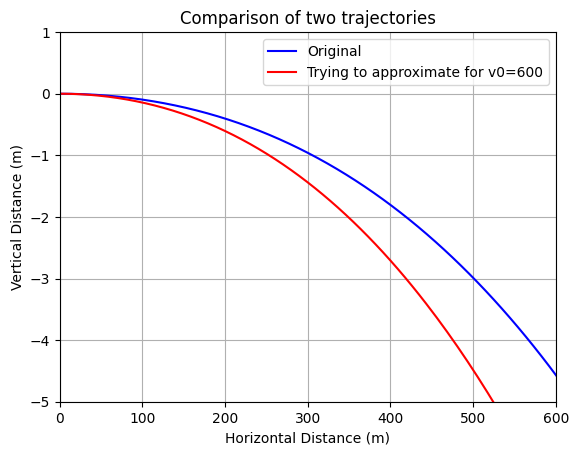

In [6]:
Trajectory.compare(trajectory735[:,0],trajectory735[:,1],trajectory600[:,0],trajectory600[:,1],x_limit=(0,600),y_limit=(1,-5),name1="Original",name2="Trying to approximate for v0=600")

Aproximace pro kompletní tabulky se všemi hodnotami
----------
Rozšíření matice trajektorie "735"(m/s) o časový vektor a následné normování rychlosti

In [7]:
trajectory735WithTime = Trajectory.addTimeToSolutionMatrix(trajectory735)
trajectory735WithTime = Trajectory.normTwoCols(trajectory735WithTime,(2,3))

In [8]:
Trajectory.printTable(trajectory735WithTime,("x","y","v","t"))

x: 0.0, y: 0.0, v: 735.0, t: 0.0
x: 7.33652, y: -0.00049, v: 730.84505, t: 0.01001
x: 14.63169, y: -0.00196, v: 726.73682, t: 0.02002
x: 21.88596, y: -0.0044, v: 722.67453, t: 0.03003
x: 29.0998, y: -0.00781, v: 718.65742, t: 0.04004
x: 36.27364, y: -0.01217, v: 714.68473, t: 0.05005
x: 43.40794, y: -0.0175, v: 710.75574, t: 0.06006
x: 50.50313, y: -0.02377, v: 706.86972, t: 0.07007
x: 57.55962, y: -0.03099, v: 703.02599, t: 0.08008
x: 64.57785, y: -0.03916, v: 699.22384, t: 0.09009
x: 71.55822, y: -0.04825, v: 695.46261, t: 0.1001
x: 78.50115, y: -0.05829, v: 691.74165, t: 0.11011
x: 85.40702, y: -0.06924, v: 688.0603, t: 0.12012
x: 92.27624, y: -0.08112, v: 684.41795, t: 0.13013
x: 99.10919, y: -0.09392, v: 680.81398, t: 0.14014
x: 105.90625, y: -0.10763, v: 677.24777, t: 0.15015
x: 112.6678, y: -0.12225, v: 673.71875, t: 0.16016
x: 119.3942, y: -0.13777, v: 670.22633, t: 0.17017
x: 126.08582, y: -0.15419, v: 666.76995, t: 0.18018
x: 132.74302, y: -0.17151, v: 663.34905, t: 0.19019
x

Vytvoření polynomu $p$ aproximující průběh rychlosti v čase

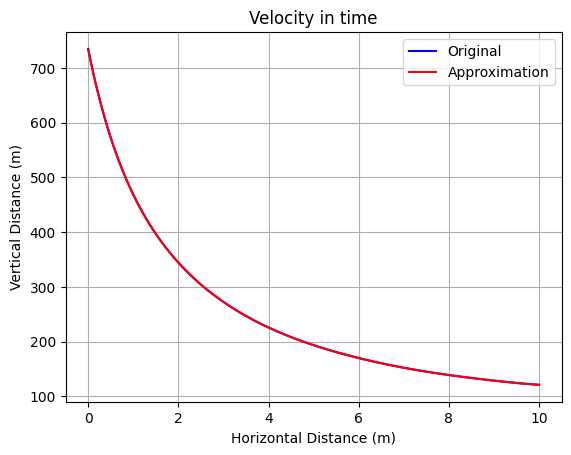

In [9]:
p = Trajectory.approximateCustom(trajectory735WithTime, 3,2, 8)

x = Trajectory.tLinspace()
Trajectory.compare(trajectory735WithTime[:,3],trajectory735WithTime[:,2],x,p(x),'Velocity in time',name1='Original',name2='Approximation')


Derivací polynomu $p$ získáme aproximaci zrychlení ze kterého lze vypočítat průběh odporové síly v závislosti na rychlosti

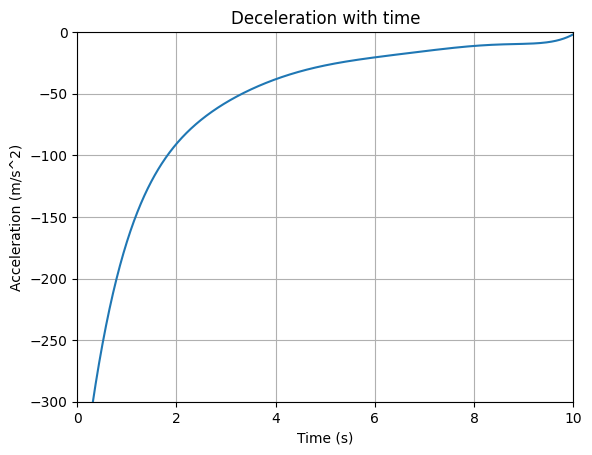

In [10]:
pdt = p.deriv()
Trajectory.plot(x,pdt(x),'Deceleration with time','Time (s)','Acceleration (m/s^2)',x_limit=(0,10),y_limit=(0,-300))

Výpočet síly vynásobením zrychlení hmotností projektilu (kg)

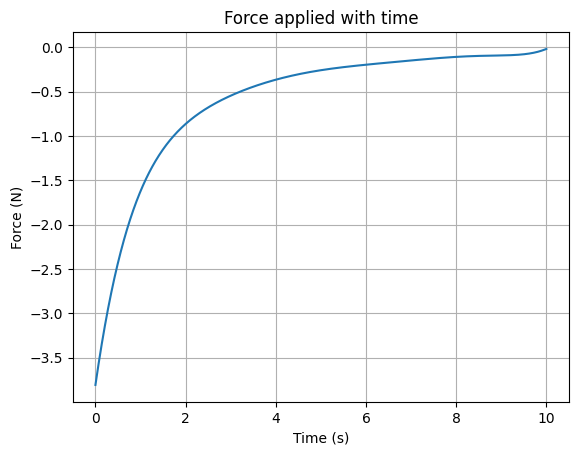

In [11]:
Trajectory.plot(x,pdt(x)*projectile.m_kg,'Force applied with time','Time (s)','Force (N)')
VelocityForceMatrix = np.zeros(shape=(len(x),2))
VelocityForceMatrix[:,0] = p(x)
VelocityForceMatrix[:,1] = pdt(x)*projectile.m_kg

Znázornění tabulky závislosti odporové síly na rychlosti

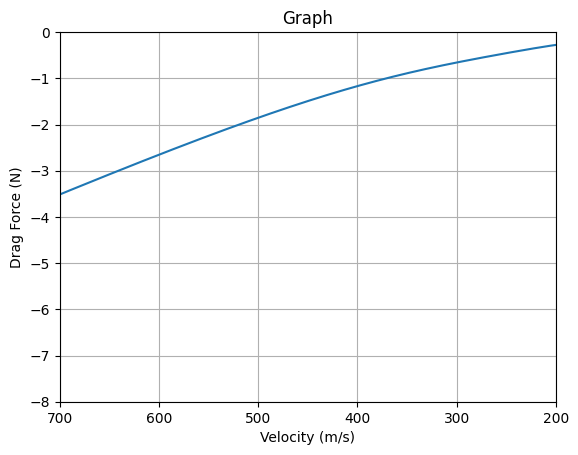

In [12]:
Trajectory.plot(VelocityForceMatrix[:,0],VelocityForceMatrix[:,1],x_limit=(700,200),y_limit=(0,-8),x_label="Velocity (m/s)",y_label="Drag Force (N)")

Aproximace funkce odporové síly
--------

Aproximace polynomem $F(v) = p'(v) \cdot m_{kg}$

Efektivnější řešení v případě aproximace funkce namísto užití pouze tabulky známých hodnot:

In [13]:
dragFunction = Trajectory.createDragFunction(trajectory735WithTime[:,2:], projectile=projectile,deg=4)

Znázornění polynomu

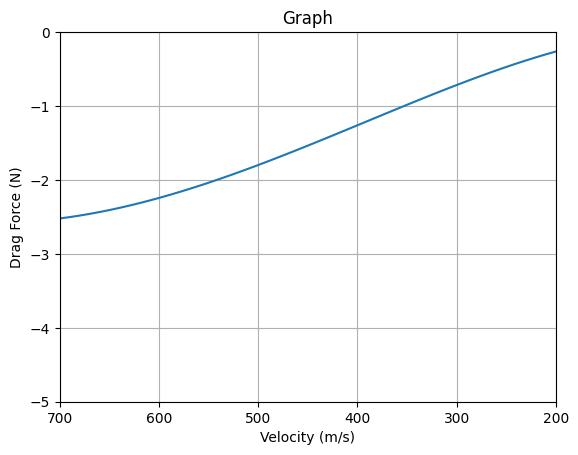

In [14]:
x = np.linspace(700,200)
Trajectory.plot(x,dragFunction(x),x_limit=(700,200),y_limit=(0,-5),x_label="Velocity (m/s)",y_label="Drag Force (N)")


---------
Vytvoření trajektorie pro testovací projektil o rychlosti 600 m/s pomocí matice závislosti odporu na rychlosti

In [15]:
app735to600 = Trajectory.trajectory(projectile,dragSource=VelocityForceMatrix,v=600)
app735to600 = Trajectory.normTwoCols(app735to600,(2,3))

Porovnání trajektorie 735m/s a 600 m/s

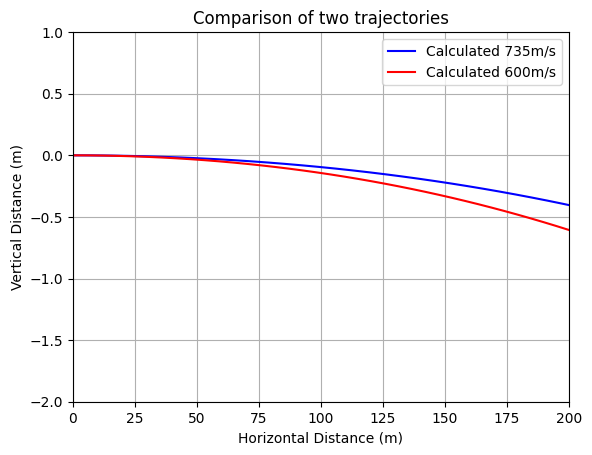

In [16]:
comparison = Trajectory.trajectory(projectile,600)

Trajectory.compare(trajectory735[:,0],trajectory735[:,1],comparison[:,0],comparison[:,1],x_limit=(0,200),y_limit=(1,-2),name1="Calculated 735m/s",name2="Calculated 600m/s")

Výpočet s odporovou maticí
---

Porovnání vypočtené trajektorie pro 600 m/s oproti trajektorie vypočtené s pomocí matice odporu odvozeného z trajektorie pro 735 m/s

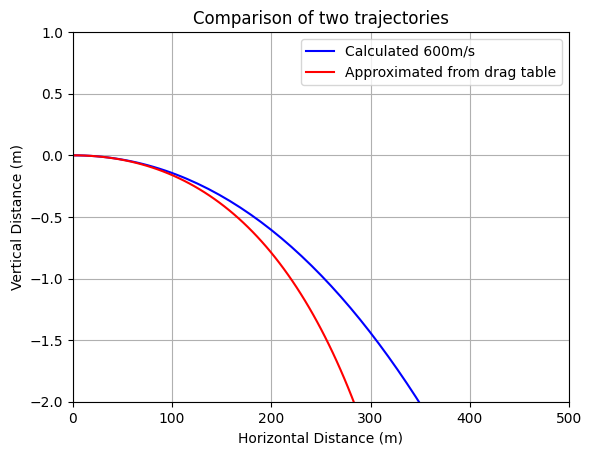

In [17]:
Trajectory.compare(comparison[:,0],comparison[:,1],app735to600[:,0],app735to600[:,1],x_limit=(0,500),y_limit=(1,-2),name1="Calculated 600m/s",name2="Approximated from drag table")

Výchylka při 300 m:

In [18]:
distance = 300
diff600 = Trajectory.getValues(comparison,distance)[0]
diff_app600 = Trajectory.getValues(app735to600,distance)[0]
print(f"Calculated y of 735 at {distance}m: {diff600}")
print(f"Calculated y of 600 at {distance}m: {diff_app600}")
print(f"Difference of impact: {(diff600-diff_app600)*100} cm")

Calculated y of 735 at 300m: -1.4791072145056925
Calculated y of 600 at 300m: -2.4402782407212578
Difference of impact: 96.11710262155653 cm


Výpočet s odporovou funkcí
---

Porovnání vypočtené trajektorie pro 600 m/s oproti trajektorii vypočtené s pomocí odporové funkce odvozené z trajektorie pro 735 m/s

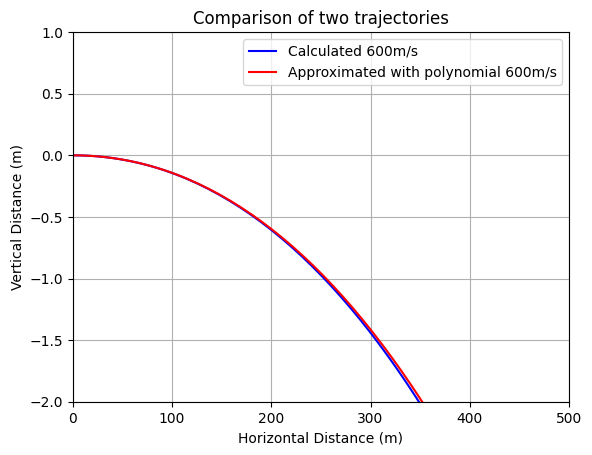

In [19]:
app735to600with_polynomial = Trajectory.trajectory(projectile, dragSource=dragFunction, v=600) 

Trajectory.compare(trajectory600[:,0],trajectory600[:,1],app735to600with_polynomial[:,0],app735to600with_polynomial[:,1],x_limit=(0,500),y_limit=(1,-2),name1="Calculated 600m/s",name2="Approximated with polynomial 600m/s")


Výchylka při 300 m:

In [20]:
distance = 300

diff600 = Trajectory.getValues(trajectory600,distance)[0]
diff600_force_poly = Trajectory.getValues(app735to600with_polynomial,distance)[0]
print(f"Calculated y of 735 at {distance}m: {diff600}")
print(f"Calculated y of 600 at {distance}m: {diff600_force_poly}")
print(f"Difference of impact: {(diff600-diff600_force_poly)*100} cm")

Calculated y of 735 at 300m: -1.4791072145056925
Calculated y of 600 at 300m: -1.4359096316593407
Difference of impact: -4.319758284635178 cm
